## Project Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

## 1. .Loading Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")
train = pd.read_csv("data/Train.csv") 
test = pd.read_csv("data/Test.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
train.shape

(8523, 12)

In [3]:
test.shape

(5681, 11)

In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

By looking this two column i know 'Item_Outlet_Sales' is my target variable

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


###  from the 12 features, 5 are numeric and 7 categorical.

In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### 2. Exploratory Data Analysis (EDA)

In [8]:
idsUnique = len(set(train.Item_Identifier))
idsTotal = train.shape[0]
Duplicate = idsTotal-idsUnique
print("Total Unique value in Item_Identifier ",Duplicate,"From ",train.Item_Identifier.shape[0])
print("Tatoal ")

Total Unique value in Item_Identifier  6964 From  8523
Tatoal 


 there seems to be 1562 unique items only available in one single store.

### 3. Univariet Analysis

Text(0.5, 1.0, ' Distribution of the target variable: Item_Outlet_Sales')

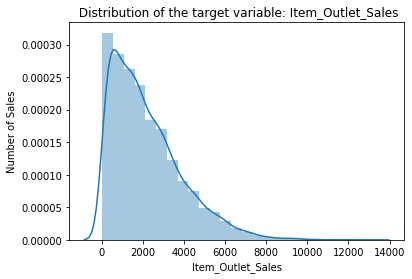

In [9]:
#Distribution of the target variable: Item_Outlet_Sales
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title(' Distribution of the target variable: Item_Outlet_Sales')

We can see that our target variable is skewed to the right, towards the higher sales, 
with higher concentration on lower sales.

To make this distribution more symmetrical, we could try taking its square root. Nevertheless, my results showed that the RMSE increased with this alteration.

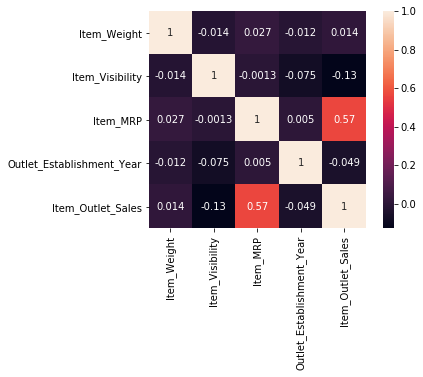

In [10]:
# Correlation between Numerical Features and Target variable
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
#correlation matrix
sns.heatmap(corr,square=True,annot=True);

From the current numeric variables we can observe that the Item_Visibility is the feature with the lowest correlation with our target variable.

In [11]:
#all categorical feature
cat_features = train.select_dtypes(include=[np.object])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


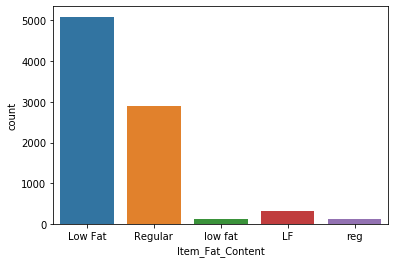

In [12]:
#Distribution of the variable Item_Fat_Content
sns.countplot(train.Item_Fat_Content)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

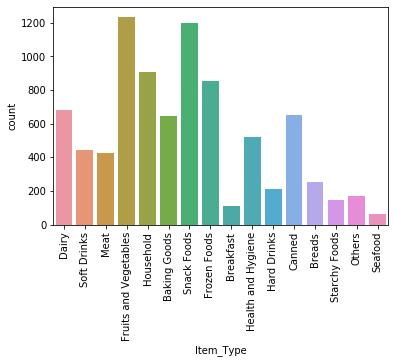

In [13]:
# Distribution of the variable Item_Type
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

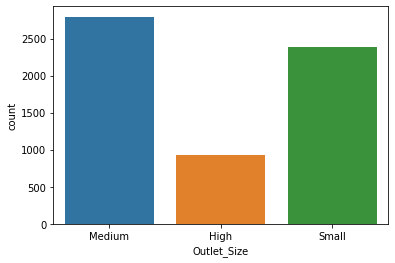

In [14]:
# Distribution of the variable Outlet_Size
sns.countplot(train.Outlet_Size)

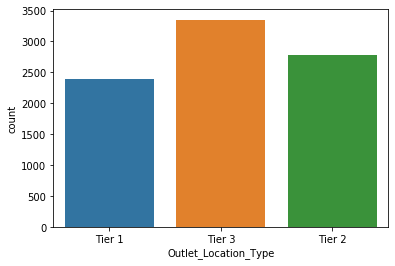

In [15]:
# Distribution of the variable Outlet_Location_Type
sns.countplot(train.Outlet_Location_Type)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

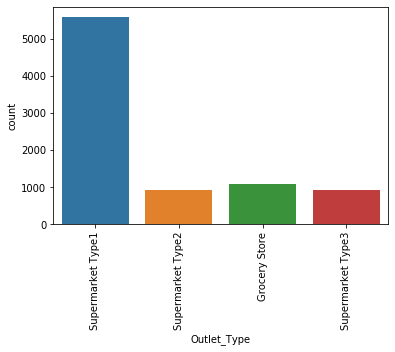

In [16]:
#Distribution of the variable Outlet_Type
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

### 4. Bivariate Analysis

In [17]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


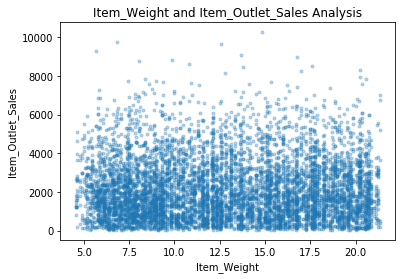

In [18]:
## Item_Weight and Item_Outlet_Sales analysis
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train['Item_Weight'], train["Item_Outlet_Sales"],'.', alpha = 0.3)

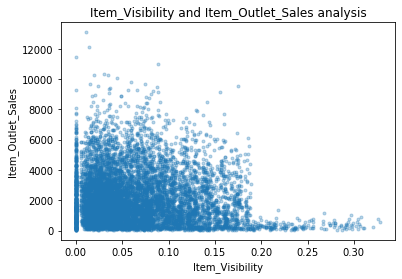

In [19]:
## Item_Visibility and Item_Outlet_Sales analysis
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales analysis")
plt.plot(train['Item_Visibility'], train["Item_Outlet_Sales"],'.', alpha = 0.3)

### Compare all Feature with Target Variable By Create Pivot

Text(0, 0.5, 'Item_Outlet_Sales')

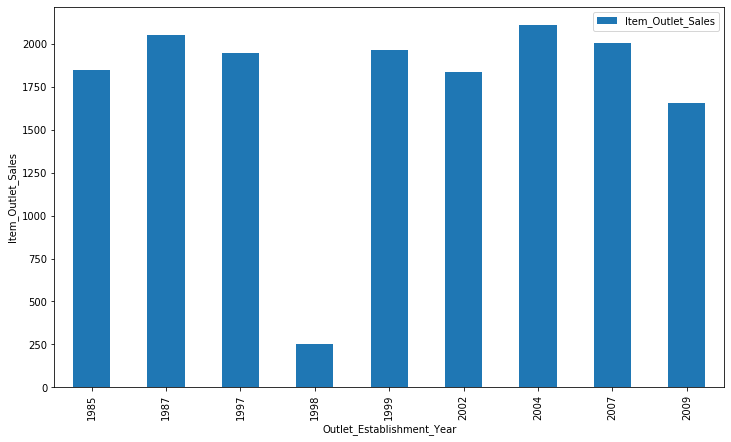

In [20]:
## Outlet_Establishment_Year and Item_Outlet_Sales analysis
Outlet_Establishment_Year_pivot = train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', figsize=(12,7))
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')

There seems to be no significant meaning between the year of store establishment and the sales for the items. 1998 has low values but thet might be due to the fact the few stores opened in that year.

Text(0, 0.5, 'Item_Outlet_Sales')

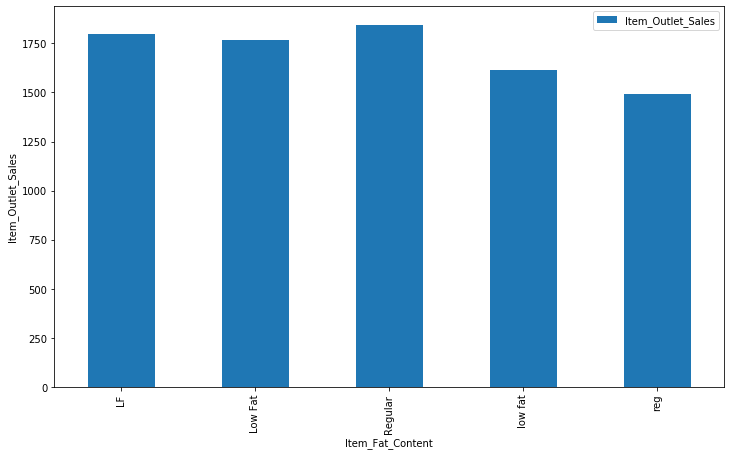

In [21]:
# Impact of Item_Fat_Content onItem_Outlet_Sales
Item_Fat_Content_pivot = train.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)
Item_Fat_Content_pivot .plot(kind='bar', figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')

“Low Fat” products seem to have higher sales values than “Regular” products.

Text(0, 0.5, 'Item_Outlet_Sales')

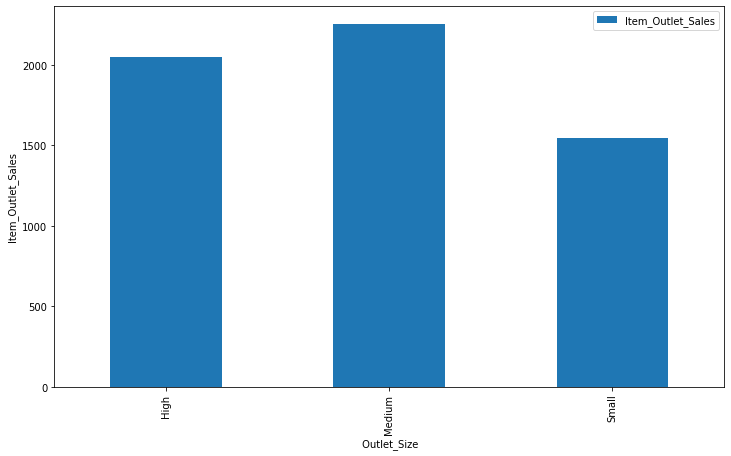

In [22]:
## Impact of Outlet_Size on Item_Outlet_Sales
Item_Fat_Content_pivot = train.pivot_table(index='Outlet_Size',values='Item_Outlet_Sales',aggfunc=np.median)
Item_Fat_Content_pivot .plot(kind='bar', figsize=(12,7))
plt.xlabel(' Outlet_Size')
plt.ylabel('Item_Outlet_Sales')


consumers tend to prefer medium size stores instead of big size.

In [23]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Conclude By Doing EDA

1. 'Item_Visibility' does not have a high positive correlation as expected. As well, there are no big variations in the sales due to the 'Item_Type'
2. On the other hand, it was possible to see that the 'Outlet_Size', 'Outlet_Location_Type' and 'Outlet_Type' of store could have a positive impact on sales.
3. Regarding 'Item_Visibility' there are items with the value zero. This does not make lot of sense, since this is indicating those items are not visible on the store.
4. Similar, 'Item_Weight' and 'Outlet_Size' seem to present NaN values.
5. There seems to be 1562 unique items only available in a single store.

### 5. Missing Value Treatment

In [24]:
a = train.isnull().sum()
a

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

 'Item_Weight' and 'Outlet_Size' seem to present NaN values.

In [25]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].median())
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].median())

In [26]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [27]:
b = train.isnull().sum()
print("before clean nan value",a.sum())
print("after Clean nan value",b.sum())

before clean nan value 3873
after Clean nan value 0


So we now got rid of all the missing values in our data that might negatively influence our analysis. 

### 6.  Feature Engineering

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [29]:
## Item_Visibility minimum value is 0
Item_Visibility_zero = test['Item_Visibility']== 0
print("There are total zero presnt is ",Item_Visibility_zero.sum())

There are total zero presnt is  353


Let’s consider it as missing value and impute it with mean visibility of that product.

In [30]:
train['Item_Visibility'] = train['Item_Visibility'].replace({ 0.000000:np.nan})
test['Item_Visibility'] = test['Item_Visibility'].replace({ 0.000000:np.nan})

In [31]:
train['Item_Visibility'] = train['Item_Visibility'].fillna(train['Item_Visibility'].mean())
test['Item_Visibility'] = test['Item_Visibility'].fillna(test['Item_Visibility'].mean())

In [32]:
## Create a broad category of Item_Type
train['Item_Type']

0                       Dairy
1                 Soft Drinks
2                        Meat
3       Fruits and Vegetables
4                   Household
                ...          
8518              Snack Foods
8519             Baking Goods
8520       Health and Hygiene
8521              Snack Foods
8522              Soft Drinks
Name: Item_Type, Length: 8523, dtype: object

In [33]:
#Get the first two characters of ID:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
train['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [34]:
#Get the first two characters of ID:
test['Item_Type_Combined'] = test['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
test['Item_Type_Combined'] = test['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
test['Item_Type_Combined'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

In [35]:
#Modify categories of Item_Fat_Content
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
print(train['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [36]:
#Modify categories of Item_Fat_Content
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
print(test['Item_Fat_Content'].value_counts())

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


In [37]:
#Mark non-consumables as separate category in low_fat:
train.loc[train['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [38]:
#Mark non-consumables as separate category in low_fat:
test.loc[test['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
test['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

## 7. Encoding Categorical Variables

In [39]:
cat_features = train.select_dtypes(include=[np.object])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,Food
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,Drinks
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,Food
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,Food
4,NCD19,Non-Edible,Household,OUT013,High,Tier 3,Supermarket Type1,Non-Consumable


In [40]:
train_copy = train.copy()
test_copy=test.copy()

In [41]:
cat_features = train_copy.select_dtypes(include=[np.object])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,Food
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,Drinks
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,Food
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,Food
4,NCD19,Non-Edible,Household,OUT013,High,Tier 3,Supermarket Type1,Non-Consumable


In [42]:
train_copy = train_copy.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1)
test_copy = test_copy.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1)

In [43]:
#encode Item_fat_content
# lets encode the education in their degree of importance 
train_copy['Item_Fat_Content'] = train_copy['Item_Fat_Content'].replace(("Low Fat", "Regular", "Non-Edible"),
                                                (3, 2, 1))
test_copy['Item_Fat_Content'] = test_copy['Item_Fat_Content'].replace(("Low Fat", "Regular", "Non-Edible"),
                                                (3, 2, 1))

3 Lowfat
2 regular
1nonedible

In [44]:
# lets encode the education in their degree of importance 
train_copy['Outlet_Size'] = train_copy['Outlet_Size'].replace(("Medium", "Small", "High"),
                                                (3, 2, 1))
test_copy['Outlet_Size'] = test_copy['Outlet_Size'].replace(("Medium", "Small", "High"),
                                                (3, 2, 1))

3 medium 2 small 1 high

In [45]:
# lets encode the education in their degree of importance 
train_copy['Outlet_Location_Type'] = train_copy['Outlet_Location_Type'].replace(("Tier 3", "Tier 2", "Tier 1"),
                                                (3, 2, 1))
test_copy['Outlet_Location_Type'] = test_copy['Outlet_Location_Type'].replace(("Tier 3", "Tier 2", "Tier 1"),
                                                (3, 2, 1))

3 tier3 2 tier2 1 tier1

In [46]:
# lets encode the education in their degree of importance 
train_copy['Item_Type_Combined'] = train_copy['Item_Type_Combined'].replace(("Food", "Non-Consumable", "Drinks"),
                                                (3, 2, 1))
test_copy['Item_Type_Combined'] = test_copy['Item_Type_Combined'].replace(("Food", "Non-Consumable", "Drinks"),
                                                (3, 2, 1))

3 food 2 non-consumable 1 drinks

In [47]:
test_copy['Outlet_Type']= test_copy['Outlet_Type'].replace(('Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'),(1,2,3,4))
train_copy['Outlet_Type'] = train_copy['Outlet_Type'].replace(('Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'), (1,2,3,4))

1 super type1 2 grocery 3 typw3 4 type2

In [48]:
cat_features = train_copy.select_dtypes(include=[np.object])
cat_features.head()

,Item_Type
0,Dairy
1,Soft Drinks
2,Meat
3,Fruits and Vegetables
4,Household


In [49]:
train_copy.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,9.30,3,0.016047,Dairy,249.8092,1999,3,1,1,3735.1380,3
1,5.92,2,0.019278,Soft Drinks,48.2692,2009,3,3,4,443.4228,1
2,17.50,3,0.016760,Meat,141.6180,1999,3,1,1,2097.2700,3
3,19.20,2,0.070482,Fruits and Vegetables,182.0950,1998,3,3,2,732.3800,3
4,8.93,1,0.070482,Household,53.8614,1987,1,3,1,994.7052,2


In [50]:
train_copy = train_copy.drop(['Item_Type'], axis = 1)
test_copy = test_copy.drop(['Item_Type'], axis = 1)

In [51]:
train_copy.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,9.30,3,0.016047,249.8092,1999,3,1,1,3735.1380,3
1,5.92,2,0.019278,48.2692,2009,3,3,4,443.4228,1
2,17.50,3,0.016760,141.6180,1999,3,1,1,2097.2700,3
3,19.20,2,0.070482,182.0950,1998,3,3,2,732.3800,3
4,8.93,1,0.070482,53.8614,1987,1,3,1,994.7052,2


In [52]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                8523 non-null   int64  
 6   Outlet_Location_Type       8523 non-null   int64  
 7   Outlet_Type                8523 non-null   int64  
 8   Item_Outlet_Sales          8523 non-null   float64
 9   Item_Type_Combined         8523 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 666.0 KB


In [53]:
test_copy.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,20.750,3,0.007565,107.8622,1999,3,1,1,3
1,8.300,2,0.038428,87.3198,2007,3,2,1,3
2,14.600,1,0.099575,241.7538,1998,3,3,2,2
3,7.315,3,0.015388,155.0340,2007,3,2,1,3
4,12.500,2,0.118599,234.2300,1985,3,3,3,3


In [54]:
#Export files as modified versions:
train_copy.to_csv("data/train_cleaned.csv",index=False)
test_copy.to_csv("data/test_cleaned.csv",index=False)